In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rad = lambda x: x/180*np.pi

In [232]:
import importlib
import two_d_tracer
importlib.reload(two_d_tracer)

<module 'two_d_tracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/two_d_tracer.py'>

# Mirrors

In [254]:
scene = two_d_tracer.Scene([two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
                           [two_d_tracer.Mirror([0,0],[-np.cos(rad(45/2)),-np.sin(rad(45/2))]),
                           two_d_tracer.Mirror([0,-5], [0,1])])

In [255]:
scene.rays

[Ray([-10.   -2.5], [1. 0.]),
 Ray([-10.    -1.25], [1. 0.]),
 Ray([-10.   0.], [1. 0.]),
 Ray([-10.     1.25], [1. 0.]),
 Ray([-10.    2.5], [1. 0.])]

In [256]:
scene.step()
scene.propagate(1e-10)
scene.step()
scene.propagate(1e-10)
scene.step()
# scene.propagate(3)

/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/two_d_tracer.py:130: RuntimeWarning: divide by zero encountered in double_scalars
  if dot != 0:


(-10.551776695296637, 1.5873106012293765, -5.375000000000001, 2.875)

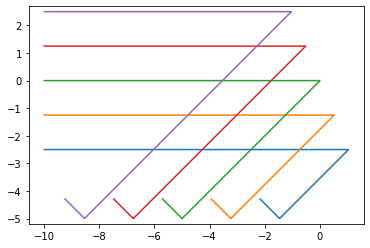

In [257]:
fig, ax = plt.subplots()

for ray in scene.rays:
    ax.plot(ray.history[:,0], ray.history[:,1])
    
ax.axis("equal")

In [237]:
[ray.done for ray in scene.rays]

[True, True, True, True, True]

# Refracting surfaces

In [238]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,0], [-1, -1], 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [239]:
scene.step()
scene.propagate(1e-14)
scene.step()

(-10.672847144889783,
 4.129790042685448,
 -2.7645138115564496,
 3.054790042685443)

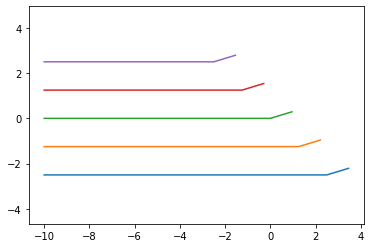

In [240]:
fig, ax = plt.subplots()

for ray in scene.rays:
    ax.plot(ray.history[:,0], ray.history[:,1])
    
ax.axis("equal")

In [241]:
scene.rays

[Ray([ 3.4569429  -2.20972377], [0.9569429  0.29027623]),
 Ray([ 2.2069429  -0.95972377], [0.9569429  0.29027623]),
 Ray([0.9569429  0.29027623], [0.9569429  0.29027623]),
 Ray([-0.2930571   1.54027623], [0.9569429  0.29027623]),
 Ray([-1.5430571   2.79027623], [0.9569429  0.29027623])]

In [242]:
scene.rays[0].angle

0.2945154851081369

In [243]:
# Compare to Snell's (algebra in Xournal)
rad(45) - np.arcsin(1/1.5*np.sin(rad(45)))

0.29451548510813697

# A glass slab

In [244]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,-0.5]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,0], [-1, 0], 1, 1.5),
                two_d_tracer.RefractiveSurface([2,0], [1, 0], 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [245]:
scene.rays[0].angle

-0.4636476090008061

In [246]:
scene.step()
scene.propagate(1e-14)
print(scene.rays[0].angle)
scene.step()
scene.propagate(1e-14)
scene.step()

-0.30274595162300433


(-5.3947213595499965,
 3.289148550549921,
 -6.500504075207105,
 2.9285954321527194)

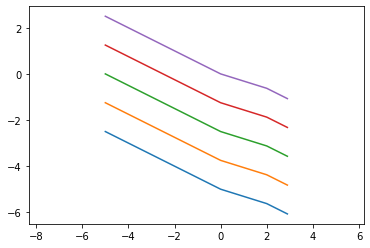

In [247]:
fig, ax = plt.subplots()

for ray in scene.rays:
    ax.plot(ray.history[:,0], ray.history[:,1])
    
ax.axis("equal")

In [248]:
scene.rays[0].angle

-0.463647609000806

# Retroreflector

In [249]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(0.1,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,2], [1, 1], 1, 1.5),
                two_d_tracer.RefractiveSurface([0,-2], [1, -1], 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [250]:
scene.step()
scene.propagate(1e-14)
scene.step()
scene.propagate(1e-14)
scene.step()

(-5.345, 2.244999999999999, -2.7499999999999987, 2.75)

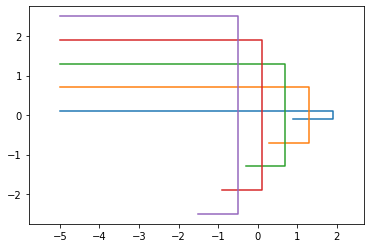

In [251]:
fig, ax = plt.subplots()

for ray in scene.rays:
    ax.plot(ray.history[:,0], ray.history[:,1])
    
ax.axis("equal")

In [215]:
scene.rays

[Ray([ 0.9 -0.1], [-1.  0.]),
 Ray([ 0.3 -0.7], [-1.  0.]),
 Ray([-0.3 -1.3], [-1.  0.]),
 Ray([-0.9 -1.9], [-1.  0.]),
 Ray([-1.5 -2.5], [-1.  0.])]